<a href="https://colab.research.google.com/github/VitorMartinsDutra/automajus/blob/main/NACIONAL_analise_cnj_sent_baixados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão principal a ser respondida

> Existe forte e necessária correlação positiva entre o efetivo de magistrados/servidores e o número de sentenças e baixas na Justiça Federal de Primeiro Grau?

# Amostra

Justiça Federal de 1º Grau (2009-2019)


# Coleta de dados

> Base de dados (abertos e públicos) do Conselho Nacional de Justiça.

> Repositório de dados <a href="https://www.cnj.jus.br/wp-content/uploads/2020/08/25-Ago-2020.v2.zip"> Clique aqui

# Tarefas iniciais da análise 

1) Fazer uma breve análise exploratória dos dados em âmbito nacional;

2) Examinar os processos sentenciados e baixados ao longo dos anos, elaborando um recorte dos ultimos 5 anos, comparando-o com os 5 anos anteriores (recorte);

3) Verificar se existe alguma correlação entre processos sentenciados/baixados e o número de magistrados/servidores em âmbito nacional;

4) Desenvolver um dashboard interativo;

# Etapa de limpeza dos dados

In [1]:
# Bibliotecas importadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carregamento dos dados
df = pd.read_csv('JN_25-Ago-2020.csv', encoding='latin-1', sep=';', low_memory=False)
df.head()

,ano,justica,sigla,dsc_tribunal,uf_sede,uf_abrangida,seq_orgao,gt,pib,h1,pop_fem,ag,ag2,agdda,ai2,ap1,apublic,apublic2,arq,arqdisp,arqjg,arqncrim,arqncrimjg,arqntutil,arqtutil,cc1,cc2,ccadm,ccjud,ccstm,cctrje1,cejusc,cn,cn2,cnc1,cnccrim1,cnccrimje,cnce,cnce1,cnce2,...,idporte,porte,cp.sus,cp.susrgrr,cp.sus.fisc,cp.sus.fisc.penal,cp.susrgrr.fisc.penal,tbaix.sus.fisc,tbaix.sus.fisc.penal,cp.sus2,cp.susrgrr2,cp.sus.fisc2,cp.sus1jetr,cp.susrgrr1jetr,cp.sus.fisc1jetr,cp.sus.fisc.penal1jetr,cp.susrgrr.fisc.penal1jetr,tbaix.sus.fisc1jetr,tbaix.sus.fisc.penal1jetr,eff,target.tbaix,eff2,target.tbaix2,eff1,target.tbaix1,ipmtarget,ipstarget,tcltarget,dpjio_tbaix_sus.fisc.penal,ipm_sus.fisc.penal,ips_sus.fisc.penal,tcl_sus.fisc.penal,munic,areakm,comarca,varae,vara,je,varaje,varah
0,2009,Estadual,TJAC,TJ - Acre,AC,Norte,8,"3519085437,46",8342355523,732793,nd,nd,nd,nd,nd,nd,64667,3249,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,68416,3677,23166,4269,3534,nd,238,0,...,3,Pequeno,55423,55423,51399,48898,48898,68121,67603,1137,1137,1137,54286,54286,50262,47761,47761,65661,65143,1,67603,nd,nd,nd,nd,"970,267605633803","51,6409295352324",nd,"1627,83524399805","952,154929577465","50,6769115442279","0,419721719126874",nd,nd,nd,nd,nd,nd,nd,nd
1,2009,Estadual,TJAL,TJ - Alagoas,AL,Nordeste,9,"5050139539,87",27133037860,3120922,nd,nd,nd,nd,nd,nd,156362,3038,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,110441,5965,55534,8204,2107,nd,99,0,...,3,Pequeno,557829,557829,255174,253770,253770,70723,70107,3616,3616,3616,554213,554213,251558,250154,250154,67205,66589,"0,388739007603878","180344,649311444",nd,nd,nd,nd,"1383,6048097144","119,658327553776",nd,"2086,94118033863","519,311111111111","44,9115951313261","0,78353819505553",nd,nd,nd,nd,nd,nd,nd,nd
2,2009,Estadual,TJAM,TJ - Amazonas,AM,Norte,10,"8686970064,25",60877122684,3480937,nd,nd,nd,nd,nd,nd,19751,6085,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,292850,5425,73488,17253,13244,nd,57,0,...,3,Pequeno,554743,554743,184327,176431,176431,171430,170092,1050,1050,1050,553693,553693,183277,175381,175381,165348,164010,"0,928211336065474","183247,061731642",nd,nd,nd,nd,"1136,62461655541","92,6138576452554",nd,"1113,73535498436","1030,86060606061","83,9960493827161","0,509146579014957",nd,nd,nd,nd,nd,nd,nd,nd
3,2009,Estadual,TJAP,TJ - Amapá,AP,Norte,11,"2384328187,39",8237795351,668689,nd,nd,nd,nd,nd,nd,28248,1411,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,63334,1654,24759,9160,156,nd,849,671,...,3,Pequeno,100883,100883,99872,96630,96630,90607,87704,1282,1282,1282,99601,99601,98590,95348,95348,89320,86417,"0,880029154587474","99660,3345955197",nd,nd,nd,nd,"1457,62964716","111,648228293106",nd,"1571,65359766943","1218,11111111111","93,3021276595745","0,524211485672746",nd,nd,nd,nd,nd,nd,nd,nd
4,2009,Estadual,TJBA,TJ - Bahia,BA,Nordeste,12,"21374933566,47",154419547376,14021432,nd,nd,nd,nd,nd,nd,170023,8292,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,596731,25339,321798,71537,27597,nd,6242,4021,...,2,Médio,1823180,1823180,1515938,1509234,1509234,678416,673219,18702,18702,18702,1804478,1804478,1497236,1490532,1490532,654934,649737,"0,5162880611993","1303960,03819294",nd,nd,nd,nd,"1996,01331103526","129,112416708864",nd,"1757,07655903948","991,486008836524","64,1344193579118","0,691531043280199",nd,nd,nd,nd,nd,nd,nd,nd


In [3]:
# Tamanho da base de dados
print('O conjunto de dados possui {} linhas.'.format(df.shape[0]))
print('O conjunto de dados possui {} colununas.'.format(df.shape[1]))

O conjunto de dados possui 995 linhas.
O conjunto de dados possui 1469 colununas.


> Colunas/variáveis destacadas para o estudo inicial

1.   Variáveis Identificadoras
* ano
* justica: Ramo de Justiça
* dsc_tribunal: Descrição do Tribunal
* uf_sede
* uf_abrangida
<br>
<br>

2.   Variáveis de Estudo
* sent1: Total de Sentenças no 1º Grau;
* tbaix1: Total de Processos Baixados no 1º Grau;
* mag1: Total de Magistrados no 1º Grau;
* sajud1: Total de Servidores Lotados na Área Judiciária no 1º Grau;


In [4]:
# Criação do subconjunto de dados com as variáveis/colunas de interesse
data = df[['ano', 'justica', 'dsc_tribunal', 'uf_sede', 'uf_abrangida', 'sent1', 'tbaix1', 'mag1', 'sajud1']]
data.head()  

,ano,justica,dsc_tribunal,uf_sede,uf_abrangida,sent1,tbaix1,mag1,sajud1
0,2009,Estadual,TJ - Acre,AC,Norte,42372,26643,56,339
1,2009,Estadual,TJ - Alagoas,AL,Nordeste,117505,54991,101,947
2,2009,Estadual,TJ - Amazonas,AM,Norte,79960,125438,125,626
3,2009,Estadual,TJ - Amapá,AP,Norte,24215,61905,58,566
4,2009,Estadual,TJ - Bahia,BA,Nordeste,268665,375254,580,9804


In [5]:
data.justica.value_counts()

Estadual            308
Trabalho            275
Eleitoral           252
Federal              66
Superior             40
Militar Estadual     36
Militar Uniao        18
Name: justica, dtype: int64

In [6]:
# Filtro para selecionar apenas a Justiça Federal de Primeiro Grau
dados_federal = data.loc[data.justica == 'Federal']
dados_federal.reset_index(drop=True, inplace=True)

In [7]:
dados_federal.head()

,ano,justica,dsc_tribunal,uf_sede,uf_abrangida,sent1,tbaix1,mag1,sajud1
0,2009,Federal,TRF 1ª Região,DF,"Distrito Federal, Goiás, Mato Grosso, Minas Ge...",163442,383101,292,3307
1,2009,Federal,TRF 2ª Região,RJ,Rio de Janeiro e Espírito Santo,109854,197094,149,1626
2,2009,Federal,TRF 3ª Região,SP,São Paulo e Mato Grosso do Sul,221589,370456,336,2782
3,2009,Federal,TRF 4ª Região,RS,"Rio Grande do Sul, Paraná e Santa Catarina",167901,178390,232,2401
4,2009,Federal,TRF 5ª Região,PE,"Sergipe, Alagoas, Pernambuco, Rio Grande do No...",162757,85499,143,1491


In [8]:
# Tamanho da base de dados
print('O novo conjunto de dados possui {} linhas.'.format(dados_federal.shape[0]))
print('O novo conjunto de dados possui {} colununas.'.format(dados_federal.shape[1]))

O novo conjunto de dados possui 66 linhas.
O novo conjunto de dados possui 9 colununas.


In [9]:
# Análise das informações gerais
dados_federal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           66 non-null     int64 
 1   justica       66 non-null     object
 2   dsc_tribunal  66 non-null     object
 3   uf_sede       66 non-null     object
 4   uf_abrangida  66 non-null     object
 5   sent1         66 non-null     object
 6   tbaix1        66 non-null     object
 7   mag1          66 non-null     object
 8   sajud1        66 non-null     object
dtypes: int64(1), object(8)
memory usage: 4.8+ KB


> Não existem dados faltantes/nulos para esse subconjunto.

In [10]:
# Análise da coluna 'ano'
dados_federal.ano.value_counts()

2019    6
2018    6
2017    6
2016    6
2015    6
2014    6
2013    6
2012    6
2011    6
2010    6
2009    6
Name: ano, dtype: int64

In [11]:
# Análise da coluna 'justica'
dados_federal.justica.value_counts()

Federal    66
Name: justica, dtype: int64

> Por se tratar de coluna que contém apenas 1 valor (todos referentes ao ramo da Justiça Federal), podemos excluir a coluna 'justica'

In [12]:
# Exclusão da coluna
del dados_federal['justica']

In [13]:
# Análise da coluna dsc_tribunal
dados_federal.dsc_tribunal.value_counts()

Justiça Federal    11
TRF 1ª Região      11
TRF 3ª Região      11
TRF 4ª Região      11
TRF 2ª Região      11
TRF 5ª Região      11
Name: dsc_tribunal, dtype: int64

> Existem dados acerca de cada um dos tribunais (11 registros de cada, pois se referem a 11 anos).

> O registro Justiça Federal refere-se ao consolidado dos 5 Tribunais.


> Como nosso exame inicial fará o recorte nacional consolidado, vamos filtrar o conjunto de dados.

In [14]:
# Filtro Justiça Federal - Âmbito Nacional
dados_federal_BR = dados_federal.loc[dados_federal.dsc_tribunal == 'Justiça Federal']
dados_federal_BR.reset_index(drop=True, inplace=True)
dados_federal_BR

,ano,dsc_tribunal,uf_sede,uf_abrangida,sent1,tbaix1,mag1,sajud1
0,2009,Justiça Federal,BR,Justiça Federal,825543,1214540,1152,11607
1,2010,Justiça Federal,BR,Justiça Federal,893797,1253354,1317,12494
2,2011,Justiça Federal,BR,Justiça Federal,866625,1238450,1223,12205
3,2012,Justiça Federal,BR,Justiça Federal,923530,1373074,1025,10689
4,2013,Justiça Federal,BR,Justiça Federal,841078,1298259,1048,15304
5,2014,Justiça Federal,BR,Justiça Federal,804051,1271053,1124,13689
6,2015,Justiça Federal,BR,Justiça Federal,732838,947093,1033,13461
7,2016,Justiça Federal,BR,Justiça Federal,687321,914200,1018,14557
8,2017,Justiça Federal,BR,Justiça Federal,796346,968677,1087,14391
9,2018,Justiça Federal,BR,Justiça Federal,841726,1052811,1137,14853


In [15]:
# Excluir colunas com valores únicos
del dados_federal_BR['dsc_tribunal']
del dados_federal_BR['uf_sede']
del dados_federal_BR['uf_abrangida']

In [16]:
dados_federal_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ano     11 non-null     int64 
 1   sent1   11 non-null     object
 2   tbaix1  11 non-null     object
 3   mag1    11 non-null     object
 4   sajud1  11 non-null     object
dtypes: int64(1), object(4)
memory usage: 568.0+ bytes


In [17]:
# Convertendo os tipos de dados para numéricos inteiros
convert = ['sent1',	'tbaix1',	'mag1',	'sajud1']

for i in convert:
  dados_federal_BR[i] = dados_federal_BR[i].astype('int')

dados_federal_BR.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ano     11 non-null     int64
 1   sent1   11 non-null     int64
 2   tbaix1  11 non-null     int64
 3   mag1    11 non-null     int64
 4   sajud1  11 non-null     int64
dtypes: int64(5)
memory usage: 568.0 bytes


> Criação de um novo campo de tipo data (ele será importante para a criação do nosso dashboard)

In [18]:
dados_federal_BR['ano_data'] = dados_federal_BR['ano'].astype('str') 

In [19]:
# Criar um campo 'ANO_data' em formato data 
dados_federal_BR['ano_data'] = dados_federal_BR['ano_data'].apply(lambda x: "{}{}".format(str(x), "-01-01"))
dados_federal_BR

,ano,sent1,tbaix1,mag1,sajud1,ano_data
0,2009,825543,1214540,1152,11607,2009-01-01
1,2010,893797,1253354,1317,12494,2010-01-01
2,2011,866625,1238450,1223,12205,2011-01-01
3,2012,923530,1373074,1025,10689,2012-01-01
4,2013,841078,1298259,1048,15304,2013-01-01
5,2014,804051,1271053,1124,13689,2014-01-01
6,2015,732838,947093,1033,13461,2015-01-01
7,2016,687321,914200,1018,14557,2016-01-01
8,2017,796346,968677,1087,14391,2017-01-01
9,2018,841726,1052811,1137,14853,2018-01-01


In [20]:
from datetime import datetime
dados_federal_BR['ano_data'] = [ datetime.strptime(d, '%Y-%m-%d') for d in dados_federal_BR['ano_data'] ] 
dados_federal_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ano       11 non-null     int64         
 1   sent1     11 non-null     int64         
 2   tbaix1    11 non-null     int64         
 3   mag1      11 non-null     int64         
 4   sajud1    11 non-null     int64         
 5   ano_data  11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 656.0 bytes


In [21]:
# Modificando o nome das colunas
dados_federal_BR.columns = ['ANO', 'SENTENÇAS', 'BAIXADOS', 'MAGISTRADOS', 'SERVIDORES', 'ANO_DATA']
dados_federal_BR

,ANO,SENTENÇAS,BAIXADOS,MAGISTRADOS,SERVIDORES,ANO_DATA
0,2009,825543,1214540,1152,11607,2009-01-01
1,2010,893797,1253354,1317,12494,2010-01-01
2,2011,866625,1238450,1223,12205,2011-01-01
3,2012,923530,1373074,1025,10689,2012-01-01
4,2013,841078,1298259,1048,15304,2013-01-01
5,2014,804051,1271053,1124,13689,2014-01-01
6,2015,732838,947093,1033,13461,2015-01-01
7,2016,687321,914200,1018,14557,2016-01-01
8,2017,796346,968677,1087,14391,2017-01-01
9,2018,841726,1052811,1137,14853,2018-01-01


In [22]:
# Criação da tabela Brasil - Registros da Justiça Federal Nacional
dados_federal_BR.to_csv('Brasil.csv', index=False)

> Finalizamos a limpeza dos dados, criando uma nova tabela pronta para ser analisada.

1.   Brasil.csv


# Análise Exploratória dos Dados 

In [23]:
df_brasil = pd.read_csv('Brasil.csv', parse_dates=['ANO_DATA'])
df_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ANO          11 non-null     int64         
 1   SENTENÇAS    11 non-null     int64         
 2   BAIXADOS     11 non-null     int64         
 3   MAGISTRADOS  11 non-null     int64         
 4   SERVIDORES   11 non-null     int64         
 5   ANO_DATA     11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5)
memory usage: 656.0 bytes


In [24]:
# Visão Geral
df_brasil

,ANO,SENTENÇAS,BAIXADOS,MAGISTRADOS,SERVIDORES,ANO_DATA
0,2009,825543,1214540,1152,11607,2009-01-01
1,2010,893797,1253354,1317,12494,2010-01-01
2,2011,866625,1238450,1223,12205,2011-01-01
3,2012,923530,1373074,1025,10689,2012-01-01
4,2013,841078,1298259,1048,15304,2013-01-01
5,2014,804051,1271053,1124,13689,2014-01-01
6,2015,732838,947093,1033,13461,2015-01-01
7,2016,687321,914200,1018,14557,2016-01-01
8,2017,796346,968677,1087,14391,2017-01-01
9,2018,841726,1052811,1137,14853,2018-01-01


## RESUMO ESTATÍSTICO - SENTENÇAS

In [25]:
# Sumarização numérica
print('A média foi {}'.format(round(df_brasil.SENTENÇAS.mean(), 0)))
print('A mediana foi {}'.format(round(df_brasil.SENTENÇAS.median(), 0)))
print('O desvio padrão foi {}'.format(round(df_brasil.SENTENÇAS.std(), 0)))
print('O máximo foi {}'.format(round(df_brasil.SENTENÇAS.max(), 0)))
print('O mínimo foi {}'.format(round(df_brasil.SENTENÇAS.min(), 0)))

A média foi 829612.0
A mediana foi 841078.0
O desvio padrão foi 72739.0
O máximo foi 923530
O mínimo foi 687321


In [26]:
# Considerando que o código acima será reutilizado, vamos criar uma função
def resumo_estatistico(coluna):
  print('A média foi {}'.format(round(coluna.mean(), 0)))
  print('A mediana foi {}'.format(round(coluna.median(), 0)))
  print('O desvio padrão foi {}'.format(round(coluna.std(), 0)))
  print('O máximo foi {}'.format(round(coluna.max(), 0)))
  print('O mínimo foi {}'.format(round(coluna.min(), 0)))

## RESUMO ESTATÍSTICO - BAIXADOS

In [27]:
# Sumarização numérica
resumo_estatistico(df_brasil.BAIXADOS)

A média foi 1165388.0
A mediana foi 1238450.0
O desvio padrão foi 162645.0
O máximo foi 1373074
O mínimo foi 914200


## GRÁFICOS - OUTLIERS

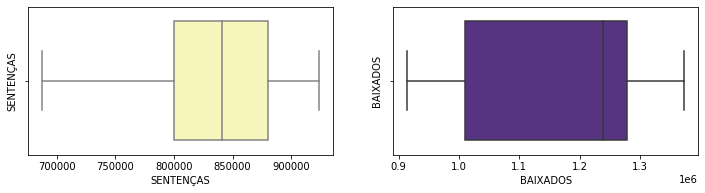

In [28]:
# Gráfico de Caixa
plt.figure(figsize=(12,6))

plt.subplot(2, 2, 1)
fig = sns.boxplot(x='SENTENÇAS', data=df_brasil, color='#ffffb2')
fig.set_ylabel('SENTENÇAS')

plt.subplot(2, 2, 2)
fig = sns.boxplot(x='BAIXADOS', data=df_brasil, color='#54278f')
fig.set_ylabel('BAIXADOS')

plt.show()

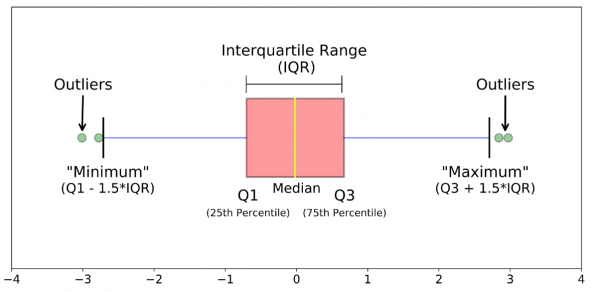

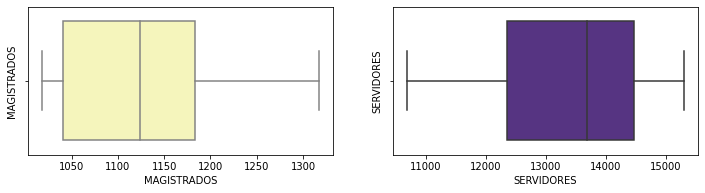

In [29]:
# Gráfico de Caixa
plt.figure(figsize=(12,6))

plt.subplot(2, 2, 1)
fig = sns.boxplot(x='MAGISTRADOS', data=df_brasil, color='#ffffb2')
fig.set_ylabel('MAGISTRADOS')

plt.subplot(2, 2, 2)
fig = sns.boxplot(x='SERVIDORES', data=df_brasil, orient="v", color='#54278f')
fig.set_ylabel('SERVIDORES')

plt.show()

> Os dois gráficos acima revelam que não existem valores discrepantes no conjunto de dados nacionais para as 4 variáveis analisadas.

## EVOLUÇÃO - SENTENÇAS/BAIXAS

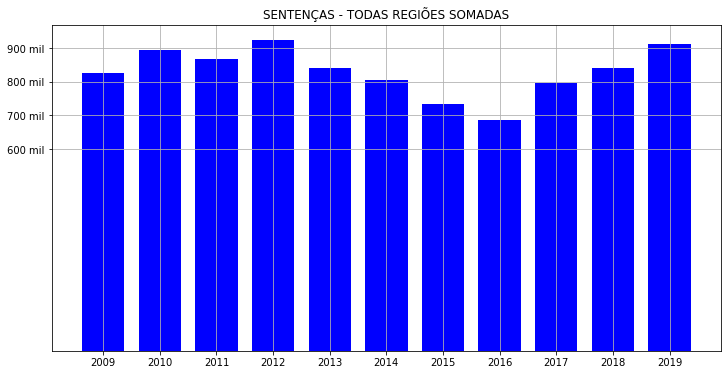

In [30]:
# Evolução no decorrer dos anos - SENTENÇAS
plt.figure(figsize=(12,6))
width = 0.75       # the width of the bars
plt.bar(df_brasil.ANO, df_brasil.SENTENÇAS, width, color='b')
plt.title('SENTENÇAS - TODAS REGIÕES SOMADAS')
plt.xticks(np.arange(2009, 2020, 1),
    ['2009', '2010','2011', '2012','2013', '2014', '2015', '2016', '2017', '2018', '2019'])


plt.yticks(np.arange(600000, 1000000, 100000),
    ['600 mil', '700 mil', '800 mil', '900 mil', '1 milhão'])



plt.grid()
plt.show()

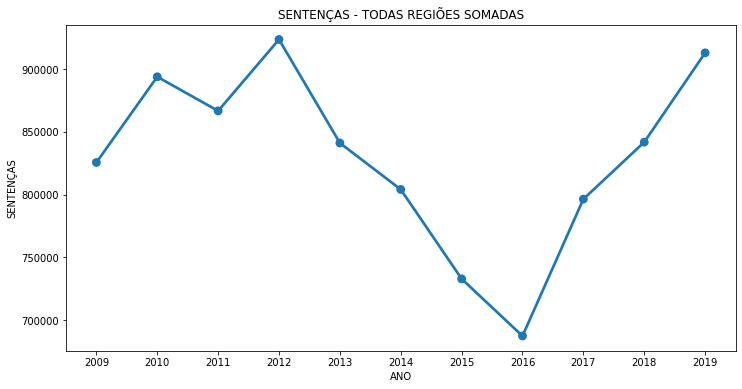

In [31]:
plt.figure(figsize=(12,6))
sns.pointplot(df_brasil['ANO'], df_brasil['SENTENÇAS'])
plt.title('SENTENÇAS - TODAS REGIÕES SOMADAS')
plt.show()

> Tendência de queda do número de prolação de sentenças entre os anos de 2013-2016

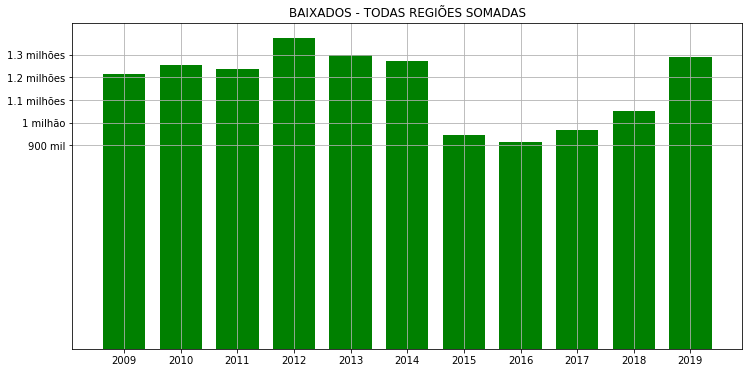

In [32]:
# Evolução no decorrer dos anos - BAIXADOS
plt.figure(figsize=(12,6))
width = 0.75       # the width of the bars
plt.bar(df_brasil.ANO, df_brasil.BAIXADOS, width, color='g')
plt.title('BAIXADOS - TODAS REGIÕES SOMADAS')

plt.yticks(np.arange(900000, 1400000, 100000),
    ['900 mil', '1 milhão', '1.1 milhões', '1.2 milhões', '1.3 milhões'])

plt.xticks(np.arange(2009, 2020, 1),
    ['2009', '2010','2011', '2012','2013', '2014', '2015', '2016', '2017', '2018', '2019'])
plt.grid()
plt.show()

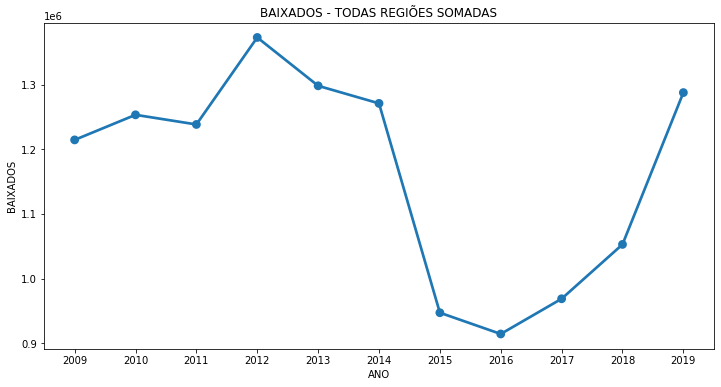

In [33]:
plt.figure(figsize=(12,6))
sns.pointplot(df_brasil['ANO'], df_brasil['BAIXADOS'])
plt.title('BAIXADOS - TODAS REGIÕES SOMADAS')
plt.show()

> Tendência de queda do número de baixas entre os anos de 2013-2016

> Atenção: queda bastante acentuada entre o ano de 2014 e 2015.

## ECDF - DISTRIBUIÇÃO

In [34]:
# Função para ECDF
def ecdf(data):
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1)/n

  return x, y

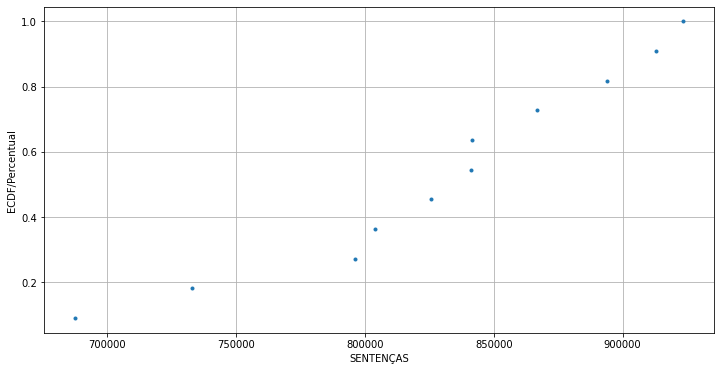

In [35]:
plt.figure(figsize=(12,6))
# Extraindo x e y
x_ecdf, y_ecdf = ecdf(df_brasil.SENTENÇAS)
# plotando o ECDF
plt.plot(x_ecdf, y_ecdf, marker = '.', linestyle = 'none')
plt.xlabel('SENTENÇAS')
plt.ylabel('ECDF/Percentual')
plt.grid()
plt.show()

> A prolação de 900.000 sentenças (ou pouco menos que isso) ocorreu em 20% das observações dos dados. No caso, apenas em 3 dos 11 registros. Vamos verificar nos números. 

In [36]:
df_brasil[['ANO', 'SENTENÇAS']]

,ANO,SENTENÇAS
0,2009,825543
1,2010,893797
2,2011,866625
3,2012,923530
4,2013,841078
5,2014,804051
6,2015,732838
7,2016,687321
8,2017,796346
9,2018,841726


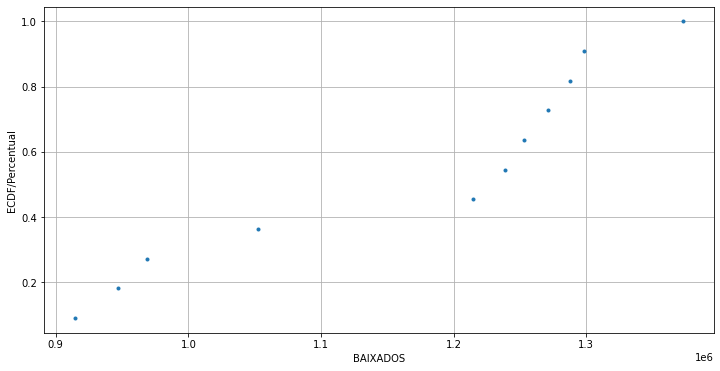

In [37]:
plt.figure(figsize=(12,6))
# Extraindo x e y
x_ecdf, y_ecdf = ecdf(df_brasil.BAIXADOS)
# plotando o ECDF
plt.plot(x_ecdf, y_ecdf, marker = '.', linestyle = 'none')
plt.xlabel('BAIXADOS')
plt.ylabel('ECDF/Percentual')
plt.grid()
plt.show()

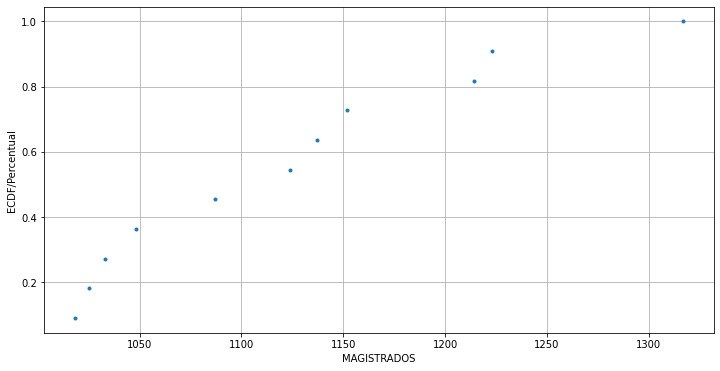

In [38]:
plt.figure(figsize=(12,6))
# Extraindo x e y
x_ecdf, y_ecdf = ecdf(df_brasil.MAGISTRADOS)
# plotando o ECDF
plt.plot(x_ecdf, y_ecdf, marker = '.', linestyle = 'none')
plt.xlabel('MAGISTRADOS')
plt.ylabel('ECDF/Percentual')
plt.grid()
plt.show()

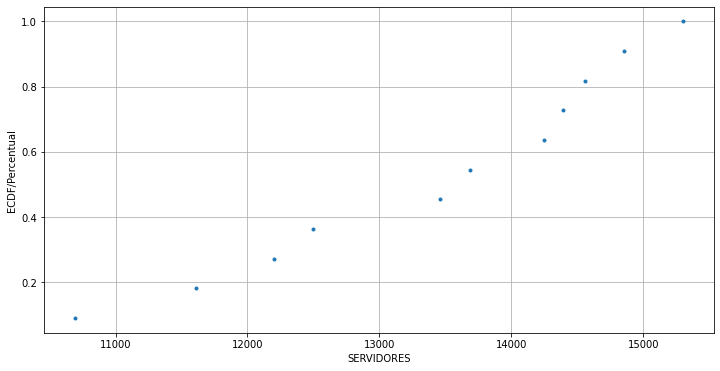

In [39]:
plt.figure(figsize=(12,6))
# Extraindo x e y
x_ecdf, y_ecdf = ecdf(df_brasil.SERVIDORES)
# plotando o ECDF
plt.plot(x_ecdf, y_ecdf, marker = '.', linestyle = 'none')
plt.xlabel('SERVIDORES')
plt.ylabel('ECDF/Percentual')
plt.grid()
plt.show()

# Recortes quinquenais - sentenciados e baixas

In [40]:
# Separar a base de dados em 2015-2019 (quinquênio de interesse) e 2010-2014 (quinquênio de comparação/anterior)
ultimo_quinquenio = df_brasil[df_brasil.ANO > 2014]
anterior_quinquenio = df_brasil[(df_brasil.ANO < 2015) & (df_brasil.ANO > 2009)]

In [41]:
ultimo_quinquenio

,ANO,SENTENÇAS,BAIXADOS,MAGISTRADOS,SERVIDORES,ANO_DATA
6,2015,732838,947093,1033,13461,2015-01-01
7,2016,687321,914200,1018,14557,2016-01-01
8,2017,796346,968677,1087,14391,2017-01-01
9,2018,841726,1052811,1137,14853,2018-01-01
10,2019,912874,1287753,1214,14246,2019-01-01


In [42]:
anterior_quinquenio

,ANO,SENTENÇAS,BAIXADOS,MAGISTRADOS,SERVIDORES,ANO_DATA
1,2010,893797,1253354,1317,12494,2010-01-01
2,2011,866625,1238450,1223,12205,2011-01-01
3,2012,923530,1373074,1025,10689,2012-01-01
4,2013,841078,1298259,1048,15304,2013-01-01
5,2014,804051,1271053,1124,13689,2014-01-01


In [43]:
resumo_estatistico(ultimo_quinquenio.SENTENÇAS)

A média foi 794221.0
A mediana foi 796346.0
O desvio padrão foi 88791.0
O máximo foi 912874
O mínimo foi 687321


In [44]:
resumo_estatistico(anterior_quinquenio.SENTENÇAS)

A média foi 865816.0
A mediana foi 866625.0
O desvio padrão foi 46210.0
O máximo foi 923530
O mínimo foi 804051


In [45]:
# Baixas
resumo_estatistico(ultimo_quinquenio.BAIXADOS)

A média foi 1034107.0
A mediana foi 968677.0
O desvio padrão foi 150762.0
O máximo foi 1287753
O mínimo foi 914200


In [46]:
resumo_estatistico(anterior_quinquenio.BAIXADOS)

A média foi 1286838.0
A mediana foi 1271053.0
O desvio padrão foi 53101.0
O máximo foi 1373074
O mínimo foi 1238450


> Como já havia sido possível perceber, o segundo quiquênio teve uma queda no número de prolação de sentenças e de baixas, especialmente nos anos de 2015 e 2016.

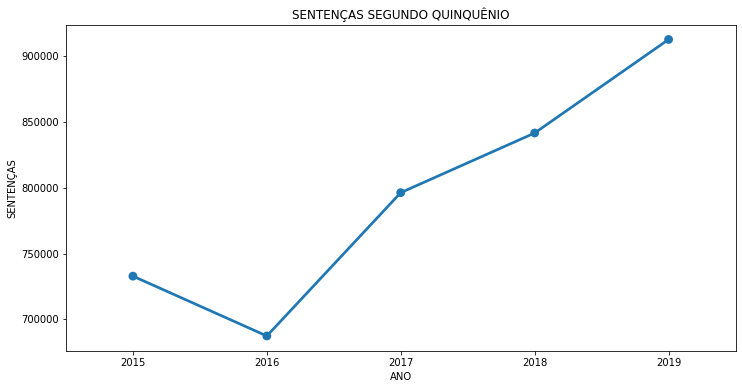

In [47]:
plt.figure(figsize=(12,6))
sns.pointplot(ultimo_quinquenio['ANO'], ultimo_quinquenio['SENTENÇAS'])
plt.title('SENTENÇAS SEGUNDO QUINQUÊNIO')
plt.show()

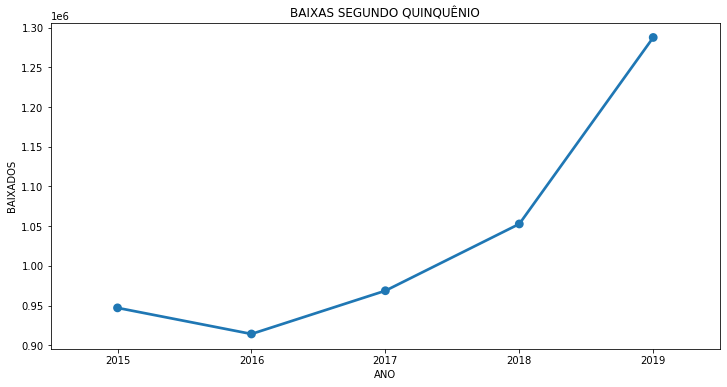

In [48]:
plt.figure(figsize=(12,6))
sns.pointplot(ultimo_quinquenio['ANO'], ultimo_quinquenio['BAIXADOS'])
plt.title('BAIXAS SEGUNDO QUINQUÊNIO')
plt.show()

> Observa-se que os gráficos acima confirmam a tendência de crescimento a partir do ano de 2016 tanto em relação aos processos sentenciados quanto em relação aos processos baixados.

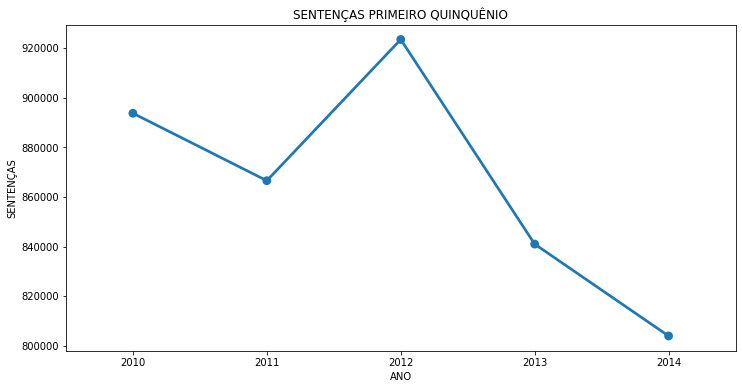

In [49]:
plt.figure(figsize=(12,6))
sns.pointplot(anterior_quinquenio['ANO'], anterior_quinquenio['SENTENÇAS'])
plt.title('SENTENÇAS PRIMEIRO QUINQUÊNIO')
plt.show()

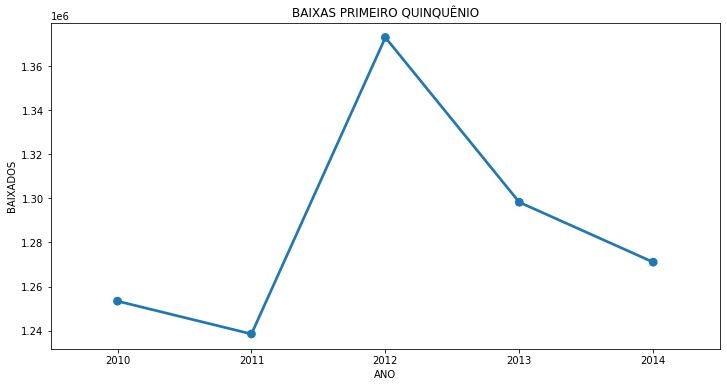

In [50]:
plt.figure(figsize=(12,6))
sns.pointplot(anterior_quinquenio['ANO'], anterior_quinquenio['BAIXADOS'])
plt.title('BAIXAS PRIMEIRO QUINQUÊNIO')
plt.show()

> Já nos gráficos acima, representando o primeiro quinquênio, observamos um pico no ano de 2012, distribuindo as observações abaixo nos anos anteriores e posteriores do recorte.

> Agora vamos investigar a existência de alguma correlação entre o número de prolação de sentenças e baixas e o número de servidores e magistrados.

# Correlação sentenças/baixados x magistrados/servidores

In [51]:
ultimo_quinquenio[['ANO', 'MAGISTRADOS']]

,ANO,MAGISTRADOS
6,2015,1033
7,2016,1018
8,2017,1087
9,2018,1137
10,2019,1214


In [52]:
# Resumo estatístico Magistrados -  SEGUNDO QUINQUÊNIO
resumo_estatistico(ultimo_quinquenio.MAGISTRADOS)

A média foi 1098.0
A mediana foi 1087.0
O desvio padrão foi 80.0
O máximo foi 1214
O mínimo foi 1018


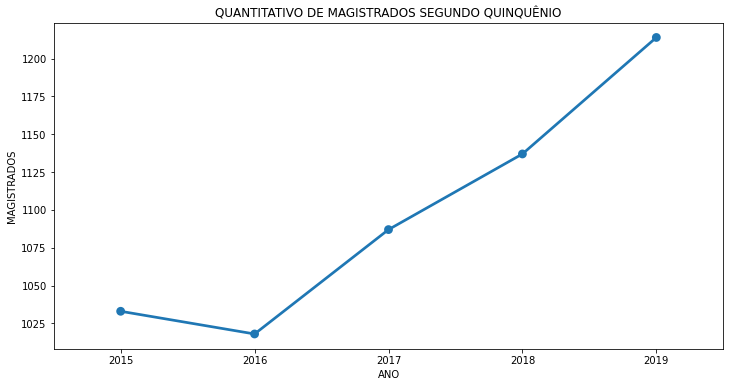

In [53]:
plt.figure(figsize=(12,6))
sns.pointplot(ultimo_quinquenio['ANO'], ultimo_quinquenio['MAGISTRADOS'])
plt.title('QUANTITATIVO DE MAGISTRADOS SEGUNDO QUINQUÊNIO')
plt.show()

> Seguindo a mesma tendência verificada no número de prolação de sentenças e baixas, o número de magistrados em cada ano apresentou tendência de crescimento a partir do ano de 2016, do que podemos deduzir uma correlação positiva (à medida que cresce o número de magistrados, cresce a produção de sentenças e baixados).

In [54]:
anterior_quinquenio[['ANO', 'MAGISTRADOS']]

,ANO,MAGISTRADOS
1,2010,1317
2,2011,1223
3,2012,1025
4,2013,1048
5,2014,1124


In [55]:
resumo_estatistico(anterior_quinquenio.MAGISTRADOS)

A média foi 1147.0
A mediana foi 1124.0
O desvio padrão foi 122.0
O máximo foi 1317
O mínimo foi 1025


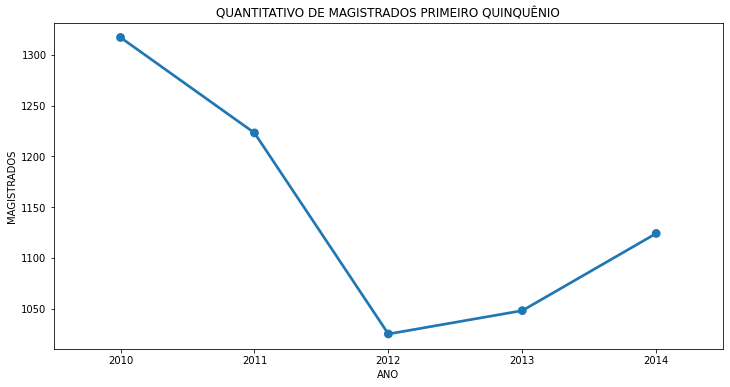

In [56]:
plt.figure(figsize=(12,6))
sns.pointplot(anterior_quinquenio['ANO'], anterior_quinquenio['MAGISTRADOS'])
plt.title('QUANTITATIVO DE MAGISTRADOS PRIMEIRO QUINQUÊNIO')
plt.show()

> Por outro lado, observamos que tendência não foi a mesma no quinquênio anterior.

> Vamos observar os números em relação aos servidores lotados na área judiciária.

In [57]:
ultimo_quinquenio[['ANO', 'SERVIDORES']]

,ANO,SERVIDORES
6,2015,13461
7,2016,14557
8,2017,14391
9,2018,14853
10,2019,14246


In [58]:
resumo_estatistico(ultimo_quinquenio.SERVIDORES)

A média foi 14302.0
A mediana foi 14391.0
O desvio padrão foi 521.0
O máximo foi 14853
O mínimo foi 13461


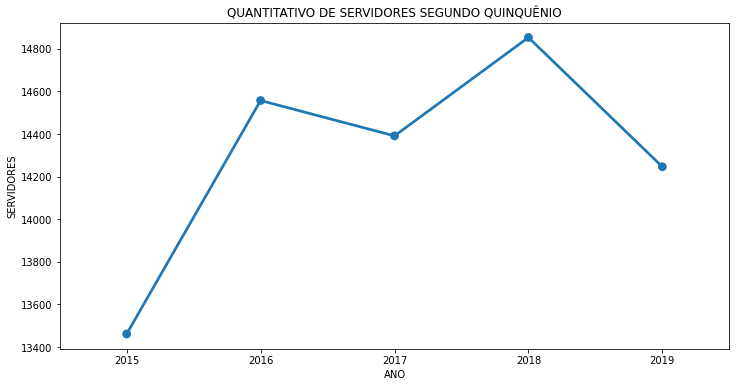

In [59]:
plt.figure(figsize=(12,6))
sns.pointplot(ultimo_quinquenio['ANO'], ultimo_quinquenio['SERVIDORES'])
plt.title('QUANTITATIVO DE SERVIDORES SEGUNDO QUINQUÊNIO')
plt.show()

In [60]:
anterior_quinquenio[['ANO', 'SERVIDORES']]

,ANO,SERVIDORES
1,2010,12494
2,2011,12205
3,2012,10689
4,2013,15304
5,2014,13689


In [61]:
resumo_estatistico(anterior_quinquenio.SERVIDORES)

A média foi 12876.0
A mediana foi 12494.0
O desvio padrão foi 1727.0
O máximo foi 15304
O mínimo foi 10689


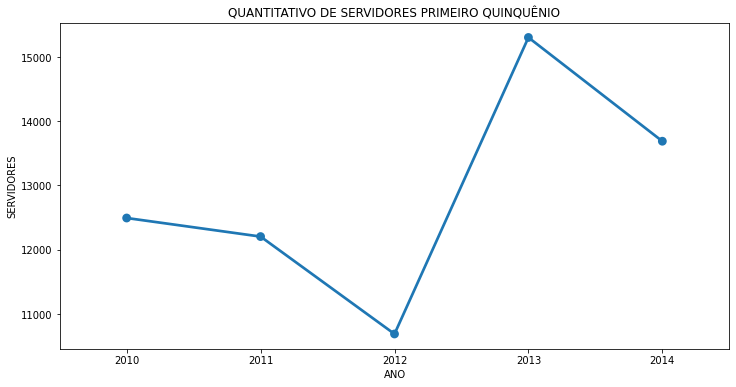

In [62]:
plt.figure(figsize=(12,6))
sns.pointplot(anterior_quinquenio['ANO'], anterior_quinquenio['SERVIDORES'])
plt.title('QUANTITATIVO DE SERVIDORES PRIMEIRO QUINQUÊNIO')
plt.show()

> Feita essa análise de tendência ao longo dos anos em relação ao quantitativo de magistrados e servidores, vamos analisar as medidas de correlação entre as variáveis.

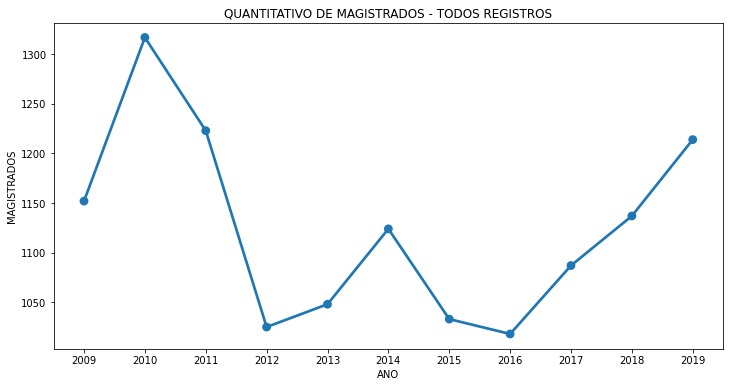

In [63]:
plt.figure(figsize=(12,6))
sns.pointplot(df_brasil['ANO'], df_brasil['MAGISTRADOS'])
plt.title('QUANTITATIVO DE MAGISTRADOS - TODOS REGISTROS')
plt.show()

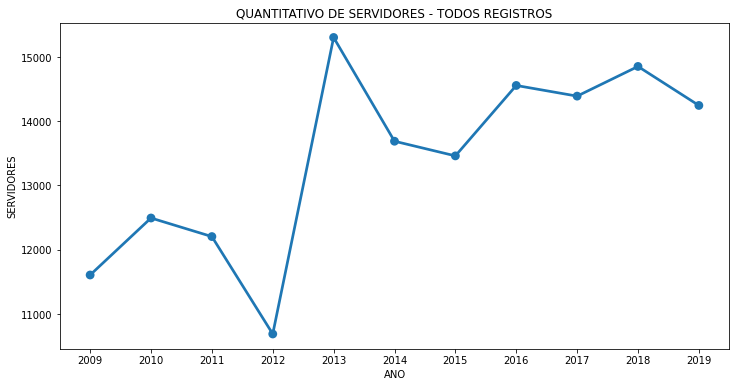

In [64]:
plt.figure(figsize=(12,6))
sns.pointplot(df_brasil['ANO'], df_brasil['SERVIDORES'])
plt.title('QUANTITATIVO DE SERVIDORES - TODOS REGISTROS')
plt.show()

In [69]:
# Avaliando a existência de correlação
ultimo_quinquenio.corr(method='pearson')

,ANO,SENTENÇAS,BAIXADOS,MAGISTRADOS,SERVIDORES
ANO,1.000000,0.916153,0.859917,0.948388,0.565984
SENTENÇAS,0.916153,1.000000,0.915203,0.987846,0.238106
BAIXADOS,0.859917,0.915203,1.000000,0.953707,0.104596
MAGISTRADOS,0.948388,0.987846,0.953707,1.000000,0.288727
SERVIDORES,0.565984,0.238106,0.104596,0.288727,1.000000


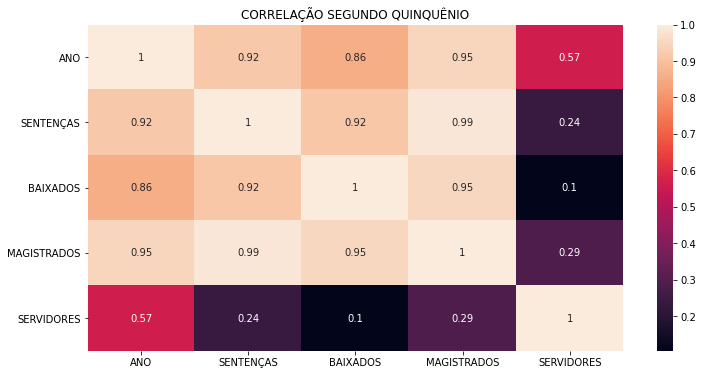

In [70]:
corr= ultimo_quinquenio.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.title('CORRELAÇÃO SEGUNDO QUINQUÊNIO')
plt.show()

* 0.9 para mais ou para menos indica uma correlação muito forte.

* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.

* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.

* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.

* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

> ÚLTIMO QUINQUÊNIO

* Correlação muito forte SENTENÇAS X BAIXAS
* Correlação muito forte SENTENÇAS X MAGISTRADOS
* Correlação desprezível SENTENÇAS X SERVIDORES

* Correlação muito forte BAIXADOS X MAGISTRADOS
* Correlação desprezível BAIXADOS X SERVIDORES

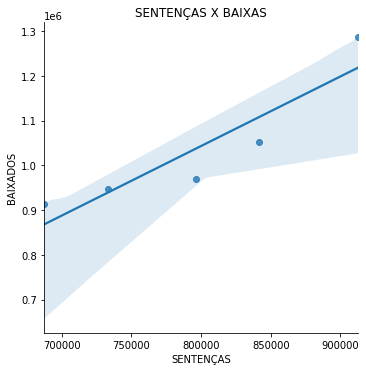

In [71]:
# Análise da correlação
sns.lmplot(x='SENTENÇAS', y='BAIXADOS', data=ultimo_quinquenio)
plt.title('SENTENÇAS X BAIXAS')

plt.show()

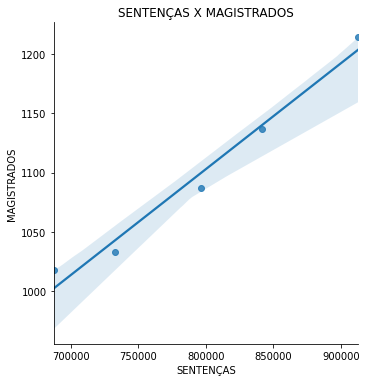

In [72]:
# Análise da correlação
sns.lmplot(x='SENTENÇAS', y='MAGISTRADOS', data=ultimo_quinquenio)
plt.title('SENTENÇAS X MAGISTRADOS')

plt.show()

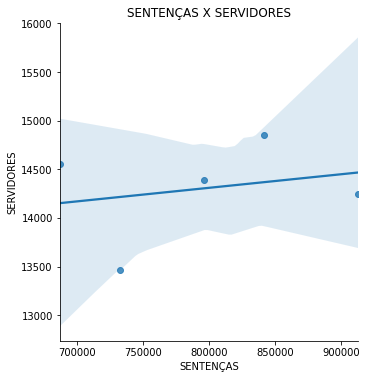

In [73]:
# Análise da correlação
sns.lmplot(x='SENTENÇAS', y='SERVIDORES', data=ultimo_quinquenio)
plt.title('SENTENÇAS X SERVIDORES')

plt.show()

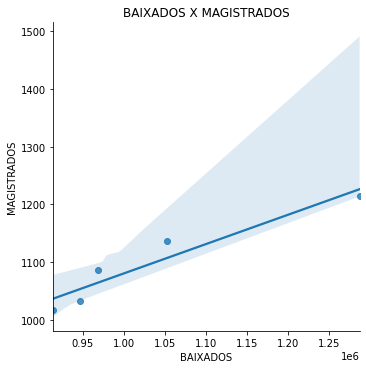

In [74]:
# Análise da correlação
sns.lmplot(x='BAIXADOS', y='MAGISTRADOS', data=ultimo_quinquenio)
plt.title('BAIXADOS X MAGISTRADOS')

plt.show()

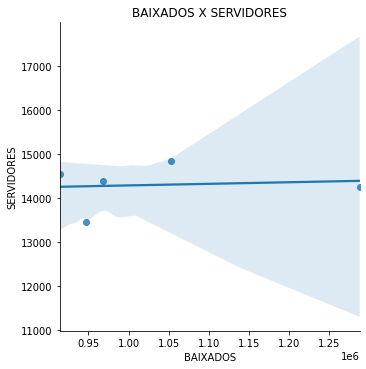

In [75]:
# Análise da correlação
sns.lmplot(x='BAIXADOS', y='SERVIDORES', data=ultimo_quinquenio)
plt.title('BAIXADOS X SERVIDORES')

plt.show()

In [76]:
# Avaliando a existência de correlação
anterior_quinquenio.corr()

,ANO,SENTENÇAS,BAIXADOS,MAGISTRADOS,SERVIDORES
ANO,1.000000,-0.701572,0.283489,-0.724918,0.502431
SENTENÇAS,-0.701572,1.000000,0.478179,0.072812,-0.775889
BAIXADOS,0.283489,0.478179,1.000000,-0.794851,-0.350073
MAGISTRADOS,-0.724918,0.072812,-0.794851,1.000000,-0.127971
SERVIDORES,0.502431,-0.775889,-0.350073,-0.127971,1.000000


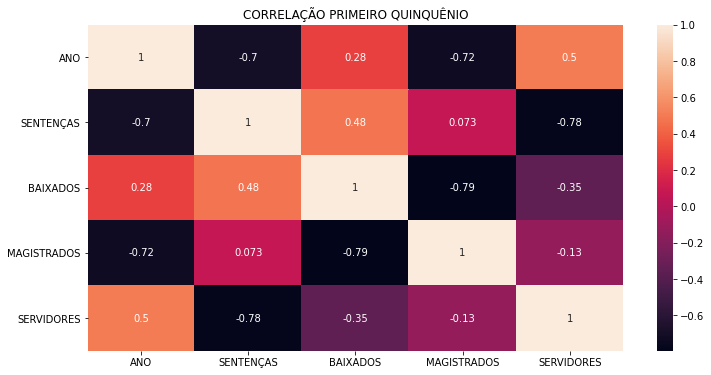

In [77]:
corr= anterior_quinquenio.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.title('CORRELAÇÃO PRIMEIRO QUINQUÊNIO')

plt.show()

* 0.9 para mais ou para menos indica uma correlação muito forte.

* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.

* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.

* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.

* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

> QUINQUÊNIO ANTERIOR

* Correlação fraca SENTENÇAS X BAIXAS
* Correlação desprezível SENTENÇAS X MAGISTRADOS
* Correlação negativa muito forte SENTENÇAS X SERVIDORES

* Correlação negativa forte BAIXADOS X MAGISTRADOS
* Correlação negativa fraca BAIXADOS X SERVIDORES

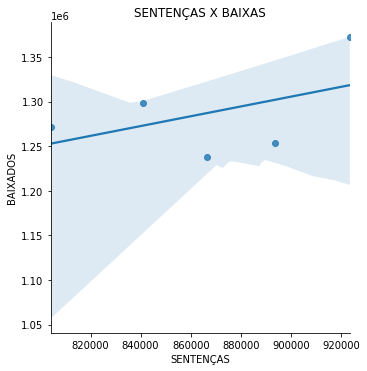

In [78]:
# Análise da correlação
sns.lmplot(x='SENTENÇAS', y='BAIXADOS', data=anterior_quinquenio)
plt.title('SENTENÇAS X BAIXAS')

plt.show()

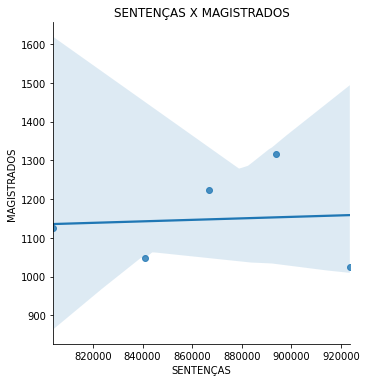

In [79]:
# Análise da correlação
sns.lmplot(x='SENTENÇAS', y='MAGISTRADOS', data=anterior_quinquenio)
plt.title('SENTENÇAS X MAGISTRADOS')

plt.show()

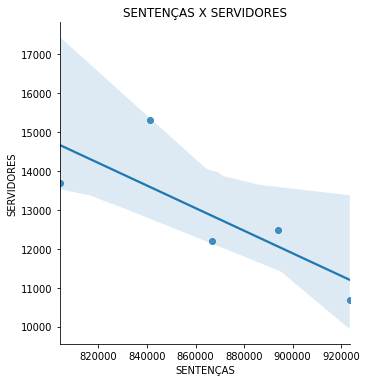

In [80]:
# Análise da correlação
sns.lmplot(x='SENTENÇAS', y='SERVIDORES', data=anterior_quinquenio)
plt.title('SENTENÇAS X SERVIDORES')

plt.show()

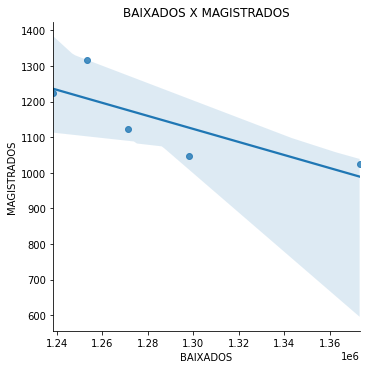

In [81]:
# Análise da correlação
sns.lmplot(x='BAIXADOS', y='MAGISTRADOS', data=anterior_quinquenio)
plt.title('BAIXADOS X MAGISTRADOS')

plt.show()

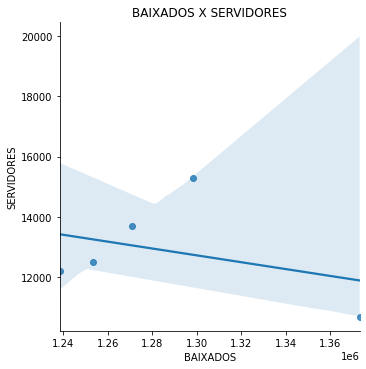

In [82]:
# Análise da correlação
sns.lmplot(x='BAIXADOS', y='SERVIDORES', data=anterior_quinquenio)
plt.title('BAIXADOS X SERVIDORES')

plt.show()

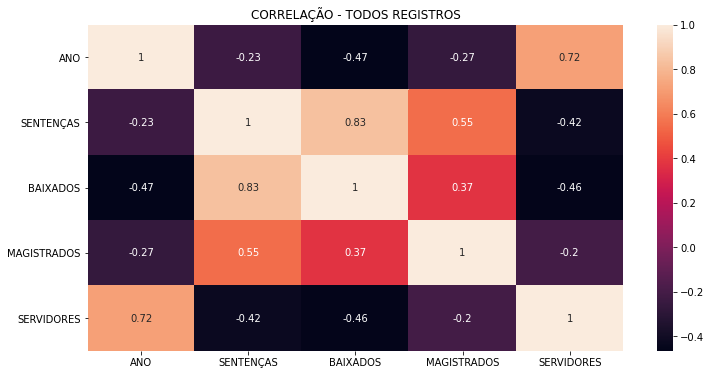

In [83]:
# Correlação Nacional
corr= df_brasil.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
plt.title('CORRELAÇÃO - TODOS REGISTROS')

plt.show()

* 0.9 para mais ou para menos indica uma correlação muito forte.

* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.

* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.

* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.

* 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

> CORRELAÇÃO - TODOS REGISTROS

* Correlação forte SENTENÇAS X BAIXAS
* Correlação moderada SENTENÇAS X MAGISTRADOS
* Correlação fraca SENTENÇAS X SERVIDORES

* Correlação fraca BAIXADOS X MAGISTRADOS
* Correlação fraca BAIXADOS X SERVIDORES

> Abaixo, um apanhado geral do relacionamento entre as variáveis.

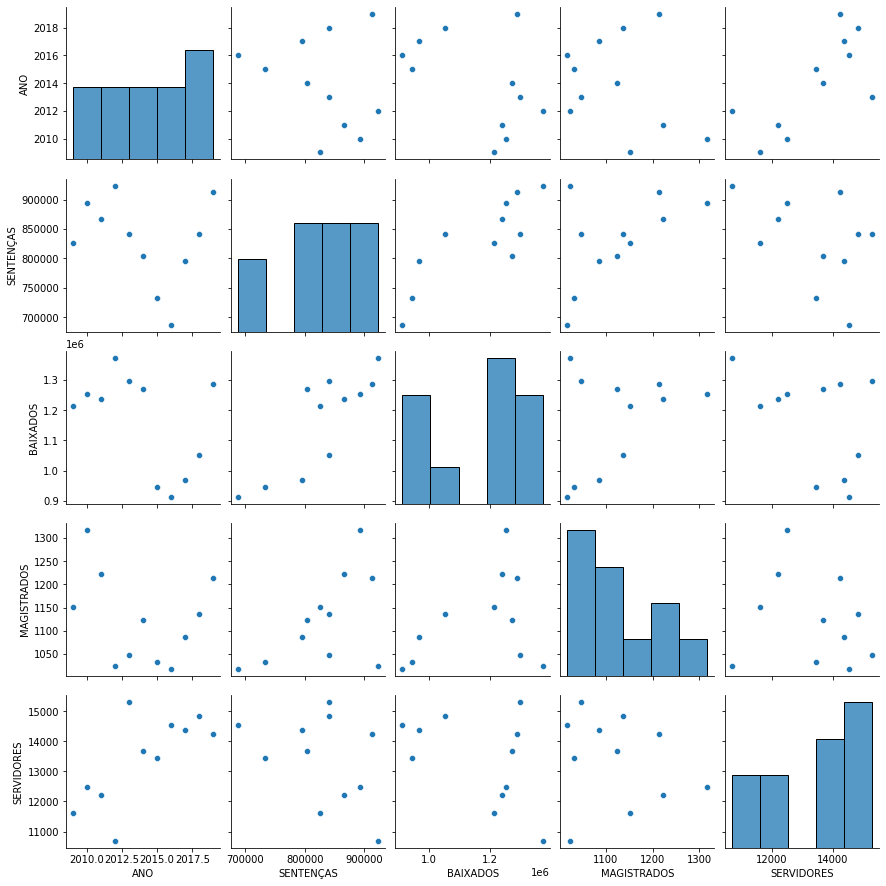

In [84]:
# Visão geral do conjunto de dados
sns.pairplot(df_brasil)

# Dashboard interativo

> Antes de criar o nosso dashboard (painel) interativo, vamos criar um indicador a ser medido.

> Optou-se por criar uma métrica simples que contemple o somatório dos processos sentenciados e baixados, dividido pelo somatório de magistrados e servidores. Chamaremos de índice de produção (IP). 

In [85]:
# Criando o indicador
df_brasil['INDICADOR'] = round((df_brasil['SENTENÇAS'] + df_brasil['BAIXADOS']) / (df_brasil['MAGISTRADOS'] + df_brasil['SERVIDORES']),2)

In [86]:
df_brasil

,ANO,SENTENÇAS,BAIXADOS,MAGISTRADOS,SERVIDORES,ANO_DATA,INDICADOR
0,2009,825543,1214540,1152,11607,2009-01-01,159.89
1,2010,893797,1253354,1317,12494,2010-01-01,155.47
2,2011,866625,1238450,1223,12205,2011-01-01,156.77
3,2012,923530,1373074,1025,10689,2012-01-01,196.06
4,2013,841078,1298259,1048,15304,2013-01-01,130.83
5,2014,804051,1271053,1124,13689,2014-01-01,140.09
6,2015,732838,947093,1033,13461,2015-01-01,115.91
7,2016,687321,914200,1018,14557,2016-01-01,102.83
8,2017,796346,968677,1087,14391,2017-01-01,114.03
9,2018,841726,1052811,1137,14853,2018-01-01,118.48


In [87]:
df_brasil[['ANO', 'INDICADOR']].sort_values(by='INDICADOR', ascending=False)

,ANO,INDICADOR
3,2012,196.06
0,2009,159.89
2,2011,156.77
1,2010,155.47
10,2019,142.34
5,2014,140.09
4,2013,130.83
9,2018,118.48
6,2015,115.91
8,2017,114.03


> Por fim, temos a seguinte tabela para alimentar o nosso painel:

In [88]:
df_brasil

,ANO,SENTENÇAS,BAIXADOS,MAGISTRADOS,SERVIDORES,ANO_DATA,INDICADOR
0,2009,825543,1214540,1152,11607,2009-01-01,159.89
1,2010,893797,1253354,1317,12494,2010-01-01,155.47
2,2011,866625,1238450,1223,12205,2011-01-01,156.77
3,2012,923530,1373074,1025,10689,2012-01-01,196.06
4,2013,841078,1298259,1048,15304,2013-01-01,130.83
5,2014,804051,1271053,1124,13689,2014-01-01,140.09
6,2015,732838,947093,1033,13461,2015-01-01,115.91
7,2016,687321,914200,1018,14557,2016-01-01,102.83
8,2017,796346,968677,1087,14391,2017-01-01,114.03
9,2018,841726,1052811,1137,14853,2018-01-01,118.48


> Nesta oportunidade, optou-se por criar um dashboard na ferramenta de BI Google Data Studio. Para tanto, vamos os dados tratados para um arquivo tipo csv.

In [91]:
# Criando a tabela
df_brasil.to_csv('dashboard_correlacao.csv', index=False)